In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os # used to check if directory exists

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
x = mnist.train.images
ytrue = mnist.train.labels
xtest = mnist.test.images
ytest = mnist.test.labels 
ytrue_cls = np.where(ytest == 1)[1]
n_output = mnist.train.labels.shape[1] #10
n_input = mnist.train.images.shape[1] # 784
learn_rate = 0.5
 


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# SPECIFY DIRECTORY HERE
Dir = "C:/Users/Anita/Documents/UCL/Advanced Topics in ML/" # CHANGE THIS, please provide full path
# test if directory works
if not os.path.exists(Dir):
	print("Please change directory")
else:
    test = np.loadtxt(Dir+"test_weights.txt")
    print(test)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [4]:
# define classes for all layers and helper functions

class LinearLayer:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        
    def forward_pass(self,x):
        self.y = np.dot(x,self.W) + self.b
        return self.y
        
    def param_gradients(self,dL_dy,x):  
        self.x = x
        self.dL_dy = dL_dy
        self.dy_dW = np.transpose(self.x)    
        self.dL_dW = np.dot(self.dy_dW,self.dL_dy)/100
        self.dL_db = np.dot(np.ones(100),self.dL_dy)/100
        return self.dL_dW, self.dL_db
    
    def backward_pass(self,dL_dy):
        self.dL_dy = dL_dy
        self.dL_dx = np.dot(self.dL_dy,self.W.T)
        return self.dL_dx
    
class ReluLayer: 
    def __init__(self,y_forward):
        self.y_forward = y_forward
        
    def forward_pass(self,x):
        self.y = x
        self.y = np.where(self.y < 0,0,self.y)
        return self.y
        
    def backward_pass(self,dL_dy):
        self.dL_dy = dL_dy        
        self.dL_dx = self.dL_dy*(self.y_forward>0)
        return self.dL_dx

def loss(z):
    z = np.exp(z)
    zz = z / z.sum(axis=1)[:,None]
    dL_dz = zz - ybatch
    return dL_dz
 
def predict(y_out,ytrue):
    z = np.exp(y_out)
    zz = z / z.sum(axis=1)[:,None]
    prediction = np.argmax(zz,axis=1)
    truevalue = np.where(ytrue == 1)[1]
    diff = prediction - truevalue
    n_wrong = np.count_nonzero(diff)
    accuracy = 1-n_wrong/ytrue.shape[0]
    return prediction, accuracy

def update(W,b,dLdW,dLdb):
    W += -learn_rate * dLdW
    b += -learn_rate * dLdb
    return W, b
   


step 0, training accuracy 0.59, test accuracy 0.4427
step 100, training accuracy 0.96, test accuracy 0.8959
step 200, training accuracy 0.96, test accuracy 0.9037
step 300, training accuracy 0.93, test accuracy 0.9097
step 400, training accuracy 0.93, test accuracy 0.9128
step 500, training accuracy 0.89, test accuracy 0.9112
step 600, training accuracy 0.86, test accuracy 0.9097
step 700, training accuracy 0.94, test accuracy 0.9129
step 800, training accuracy 0.94, test accuracy 0.9144
step 900, training accuracy 0.9, test accuracy 0.9158
final train accuracy: 0.914636
final test accuracy: 0.9187
test accuracy as reported: 0.9174


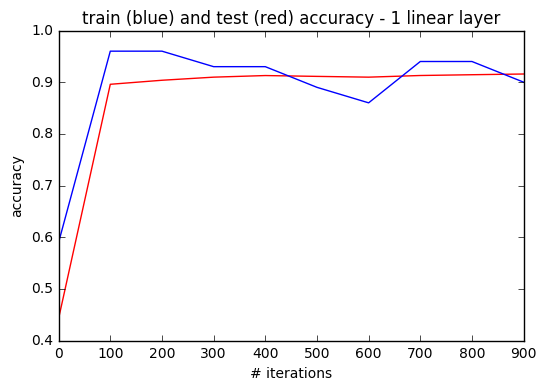

Confusion Matrix:
[[ 966    0    1    1    0    2    8    1    1    0]
 [   0 1116    2    2    0    2    4    2    7    0]
 [   9   10  919   14    8    4   16   10   35    7]
 [   5    1   17  920    0   31    2    8   14   12]
 [   4    4    4    1  878    1   13    2   10   65]
 [  12    4    3   32    6  777   19    3   28    8]
 [  15    3    5    1    8   12  911    1    2    0]
 [   3   11   27    7    6    2    0  925    2   45]
 [  10   12    8   20    9   36   11   10  840   18]
 [  12    7    1   10   15    7    1   15    6  935]]


In [5]:
# part a) one linear layer

W = np.random.normal(0, 0.01,[n_input, n_output])
b = np.random.normal(0, 0.001,[1, n_output])
save_train_error = np.ones((10))
save_test_error = np.ones((10))

# train

# # alternative code : train on all consecutive points instead of random selection
# for i in range(549):
#     xbatch = x[i*100:i*100+100,:]
#     ybatch = ytrue[i*100:i*100+100,:]

for i in range(1000):
    idx = np.random.randint(55000, size=100)
    xbatch = x[idx,:]
    ybatch = ytrue[idx,:]
    
    # forward
    z = LinearLayer(W,b).forward_pass(xbatch)
    
    # backward
    dL_dz = loss(z)
    
    #update
    dL_dW, dL_db = LinearLayer(W,b).param_gradients(dL_dz,xbatch)
    W,b = update(W,b,dL_dW,dL_db)
    
    # accuracy
    if (i % 100) == 0:
        y_out_train = LinearLayer(W,b).forward_pass(xbatch)
        _, train_iter_accuracy = predict(y_out_train, ybatch)
        y_out_test_iter = LinearLayer(W,b).forward_pass(xtest)
        _, test_iter_accuracy = predict(y_out_test_iter, ytest)
        print("step %d, training accuracy %g, test accuracy %g"%(i, train_iter_accuracy,test_iter_accuracy))
        j=int(i/100)
        save_test_error[j] = test_iter_accuracy
        save_train_error[j] = train_iter_accuracy
        
# test
y_out_train = LinearLayer(W,b).forward_pass(mnist.train.images)
_, train_accuracy = predict(y_out_train, mnist.train.labels)
print("final train accuracy: %g"%(train_accuracy))

y_out = LinearLayer(W,b).forward_pass(xtest)
ypred, accuracy = predict(y_out, ytest)
print("final test accuracy: %g"%(accuracy))

# save/load weights
#W.dump("p2a_W.dat")
#b.dump("p2a_b.dat")

W_check = np.load(Dir+"p2a_W.dat")
b_check = np.load(Dir+"p2a_b.dat")

y_check = LinearLayer(W_check,b_check).forward_pass(xtest)
_, check_accuracy = predict(y_check, ytest)
print("test accuracy as reported: %g"%(check_accuracy))

# plot
t = np.arange(0., 1000., 100)
plt.plot(t,save_test_error,'r',t,save_train_error,'b')
plt.ylabel('accuracy')
plt.xlabel('# iterations')
plt.title('train (blue) and test (red) accuracy - 1 linear layer')
plt.show()

# Get confusion matrix 
cm = confusion_matrix(y_true=ytrue_cls,y_pred=ypred)
print("Confusion Matrix:")
print(cm)



step 0, training accuracy 0.17, test accuracy 0.1188
step 100, training accuracy 0.95, test accuracy 0.8853
step 200, training accuracy 0.97, test accuracy 0.9223
step 300, training accuracy 0.97, test accuracy 0.9337
step 400, training accuracy 0.97, test accuracy 0.9391
step 500, training accuracy 1, test accuracy 0.9487
step 600, training accuracy 1, test accuracy 0.9557
step 700, training accuracy 1, test accuracy 0.96
step 800, training accuracy 0.99, test accuracy 0.955
step 900, training accuracy 0.99, test accuracy 0.9585
final test accuracy: 0.9594
final train accuracy: 0.962455
test accuracy as reported: 0.9631


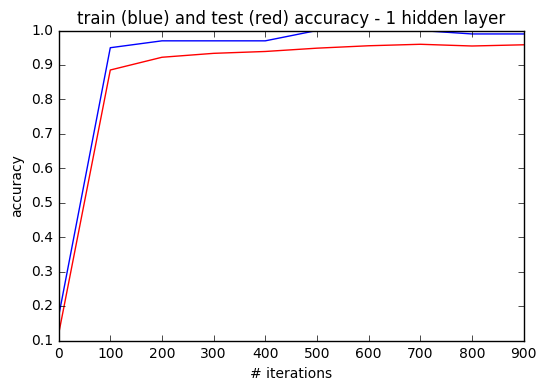

Confusion Matrix:
[[ 975    0    0    1    1    1    1    1    0    0]
 [   0 1121    3    0    1    1    3    3    3    0]
 [  16    2  989    1    3    0    7   11    2    1]
 [   6    0   13  957    1    9    0   14    5    5]
 [   4    0    3    0  952    0    6    3    2   12]
 [  11    1    2   10    3  841   13    2    4    5]
 [  13    3    0    1    4    4  931    0    2    0]
 [   2    4   16    0    1    0    0  996    0    9]
 [  30    3    4    2    9   11   12   12  886    5]
 [  12    6    1    8   20    3    0   12    1  946]]


In [6]:
# part b) one hidden layer

n_units = 128
W_relu = np.random.normal(0, 0.01,[n_input, n_units])
b_relu = 0.01 * np.ones((n_units))
W_linear = np.random.normal(0, 0.01,[n_units, n_output])
b_linear = 0.01 * np.ones((n_output))

save_train_error = np.ones((10))
save_test_error = np.ones((10))


# train
for i in range(1000):
    idx = np.random.randint(55000, size=100)
    xbatch = x[idx,:]
    ybatch = ytrue[idx,:]
    # forward
    z1 = LinearLayer(W_relu,b_relu).forward_pass(xbatch) #100 x128
    h1 = ReluLayer(0).forward_pass(z1) #100 x 128
    z2 = LinearLayer(W_linear,b_linear).forward_pass(h1) #100 x 10
    
    # backward
    dL_dz2 = loss(z2) # 100 x 10 
    dL_dh1 = LinearLayer(W_linear,b_linear).backward_pass(dL_dz2) #100 x 128 
    dL_dz1 = ReluLayer(z1).backward_pass(dL_dh1) #100 x 128
    
    # update Ws and bs
    dL_dW_linear, dL_db_linear = LinearLayer(W_linear,b_linear).param_gradients(dL_dz2,h1)
    W_linear, b_linear = update(W_linear,b_linear,dL_dW_linear,dL_db_linear)
    
    dL_dW_relu, dL_db_relu = LinearLayer(W_relu,b_relu).param_gradients(dL_dz1,xbatch)
    W_relu , b_relu = update(W_relu,b_relu,dL_dW_relu,dL_db_relu)
    
    # accuracy
    if (i % 100) == 0:
        #calculate training error in each step
        y_out_train_iter = LinearLayer(W_relu,b_relu).forward_pass(xbatch) 
        htrain_iter = ReluLayer(0).forward_pass(y_out_train_iter)
        ztrain_iter = LinearLayer(W_linear,b_linear).forward_pass(htrain_iter)
        _, accuracy_train_iter = predict(ztrain_iter, ybatch)
        
        # calculate test error in each step
        y_out_test_iter = LinearLayer(W_relu,b_relu).forward_pass(xtest) 
        htest_iter = ReluLayer(0).forward_pass(y_out_test_iter)
        ztest_iter = LinearLayer(W_linear,b_linear).forward_pass(htest_iter)
        _, accuracy_test_iter = predict(ztest_iter, ytest)    
        
        #print
        print("step %d, training accuracy %g, test accuracy %g"%(i, accuracy_train_iter,accuracy_test_iter))
        
        j=int(i/100)
        save_test_error[j] = accuracy_test_iter
        save_train_error[j] = accuracy_train_iter
        

# final test and train errors
y_out_test = LinearLayer(W_relu,b_relu).forward_pass(xtest) 
htest = ReluLayer(0).forward_pass(y_out_test)
ztest = LinearLayer(W_linear,b_linear).forward_pass(htest)
ypred, accuracy_test = predict(ztest, ytest)
print("final test accuracy: %g"%(accuracy_test))

y_out_train = LinearLayer(W_relu,b_relu).forward_pass(mnist.train.images) 
htrain = ReluLayer(0).forward_pass(y_out_train)
ztrain = LinearLayer(W_linear,b_linear).forward_pass(htrain)
_, accuracy_train = predict(ztrain, mnist.train.labels)
print("final train accuracy: %g"%(accuracy_train))

# save/load weights
#W_relu.dump("p2b_W_relu.dat")
#b_relu.dump("p2b_b_relu.dat")
#W_linear.dump("p2b_W_linear.dat")
#b_linear.dump("p2b_b_linear.dat")

W_relu_check = np.load(Dir+"p2b_W_relu.dat")
b_relu_check = np.load(Dir+"p2b_b_relu.dat")
W_linear_check = np.load(Dir+"p2b_W_linear.dat")
b_linear_check = np.load(Dir+"p2b_b_linear.dat")

y_check = LinearLayer(W_relu_check,b_relu_check).forward_pass(xtest) 
htest_check = ReluLayer(0).forward_pass(y_check)
ztest_check = LinearLayer(W_linear_check,b_linear_check).forward_pass(htest_check)
_, accuracy_test_check = predict(ztest_check, ytest)
print("test accuracy as reported: %g"%(accuracy_test_check))


# plot
t = np.arange(0., 1000., 100)
plt.plot(t,save_test_error,'r',t,save_train_error,'b')
plt.ylabel('accuracy')
plt.xlabel('# iterations')
plt.title('train (blue) and test (red) accuracy - 1 hidden layer')
plt.show()

# Get confusion matrix 
print("Confusion Matrix:")
cm = confusion_matrix(y_true=ytrue_cls,y_pred=ypred)
print(cm)

step 0, training accuracy 0.15, test accuracy 0.0974
step 100, training accuracy 0.89, test accuracy 0.8383
step 200, training accuracy 0.98, test accuracy 0.8936
step 300, training accuracy 0.96, test accuracy 0.9255
step 400, training accuracy 0.96, test accuracy 0.9397
step 500, training accuracy 0.99, test accuracy 0.9428
step 600, training accuracy 0.99, test accuracy 0.9558
step 700, training accuracy 0.99, test accuracy 0.9535
step 800, training accuracy 1, test accuracy 0.9607
step 900, training accuracy 1, test accuracy 0.9598
final train accuracy: 0.970382
final test accuracy: 0.9644
accuracy as reported: 0.9642


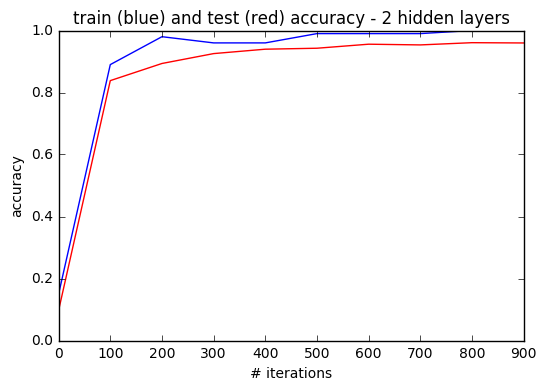

Confusion Matrix:
[[ 970    0    2    2    0    1    1    1    1    2]
 [   0 1119    7    1    0    0    3    1    4    0]
 [   4    1 1007    5    2    0    2    6    3    2]
 [   1    0   15  980    0    5    0    5    3    1]
 [   2    0    7    0  945    0    2    4    0   22]
 [   4    0    0   33    0  837    8    2    3    5]
 [  11    3    3    1    6    5  926    0    3    0]
 [   0    8   14    4    0    0    1  988    3   10]
 [   8    2   16   20    5    8    6    5  897    7]
 [   4    4    0    5   10    2    0    9    0  975]]


In [7]:
# part c) two hidden layers

save_train_error = np.ones((10))
save_test_error = np.ones((10))

# train
n_units = 256
W_relu1 = np.random.normal(0, 0.01,[n_input, n_units])
b_relu1 = 0.01 * np.ones((n_units))

W_relu2 = np.random.normal(0, 0.01,[n_units, n_units])
b_relu2 = 0.01 * np.ones((n_units))

W_linear = np.random.normal(0, 0.01,[n_units, n_output])
b_linear = 0.01 * np.ones((n_output))

for i in range(1000):
    idx = np.random.randint(55000, size=100)
    xbatch = x[idx,:]
    ybatch = ytrue[idx,:]
    
    # forward
    z1 = LinearLayer(W_relu1,b_relu1).forward_pass(xbatch) 
    h1 = ReluLayer(0).forward_pass(z1) 

    z2 = LinearLayer(W_relu2,b_relu2).forward_pass(h1)
    h2 = ReluLayer(0).forward_pass(z2)
    
    z3 = LinearLayer(W_linear,b_linear).forward_pass(h2) 
    
    # backward
    dL_dz3 = loss(z3)  

    dL_dh2 = LinearLayer(W_linear,b_linear).backward_pass(dL_dz3)    
    dL_dz2 = ReluLayer(z2).backward_pass(dL_dh2)
    
    dL_dh1 = LinearLayer(W_relu2,b_relu2).backward_pass(dL_dz2)
    dL_dz1 = ReluLayer(z1).backward_pass(dL_dh1) 

    
    # update Ws and bs
    dL_dW_linear, dL_db_linear = LinearLayer(W_linear,b_linear).param_gradients(dL_dz3,h2)
    W_linear, b_linear = update(W_linear,b_linear,dL_dW_linear,dL_db_linear)
    
    dL_dW_relu2, dL_db_relu2 = LinearLayer(W_relu2,b_relu2).param_gradients(dL_dz2,h1)
    W_relu2, b_relu2 = update(W_relu2,b_relu2,dL_dW_relu2,dL_db_relu2)
    
    dL_dW_relu1, dL_db_relu1 = LinearLayer(W_relu1,b_relu1).param_gradients(dL_dz1,xbatch)
    W_relu1, b_relu1 = update(W_relu1,b_relu1,dL_dW_relu1,dL_db_relu1)
    
    # accuracy
    if (i % 100) == 0:
        # calculate train error in each step
        y_out_train_iter = LinearLayer(W_relu1,b_relu1).forward_pass(xbatch) 
        h1train_iter = ReluLayer(0).forward_pass(y_out_train_iter) 
        z2train_iter = LinearLayer(W_relu2,b_relu2).forward_pass(h1train_iter)
        h2train_iter = ReluLayer(0).forward_pass(z2train_iter)
        z3train_iter = LinearLayer(W_linear,b_linear).forward_pass(h2train_iter) 
        _, accuracy_train_iter = predict(z3train_iter, ybatch)
        
        #calculate training error in each step
        y_out_iter = LinearLayer(W_relu1,b_relu1).forward_pass(xtest) 
        h1test_iter = ReluLayer(0).forward_pass(y_out_iter) 
        z2test_iter = LinearLayer(W_relu2,b_relu2).forward_pass(h1test_iter)
        h2test_iter = ReluLayer(0).forward_pass(z2test_iter)
        z3test_iter = LinearLayer(W_linear,b_linear).forward_pass(h2test_iter)
        _, accuracy_test_iter = predict(z3test_iter, ytest)
        
        #print
        print("step %d, training accuracy %g, test accuracy %g"%(i, accuracy_train_iter,accuracy_test_iter))
        
        j=int(i/100)
        save_test_error[j] = accuracy_test_iter
        save_train_error[j] = accuracy_train_iter
    
# final test and train errors
y_out_train = LinearLayer(W_relu1,b_relu1).forward_pass(mnist.train.images) 
h1train = ReluLayer(0).forward_pass(y_out_train) 
z2train = LinearLayer(W_relu2,b_relu2).forward_pass(h1train)
h2train = ReluLayer(0).forward_pass(z2train)
z3train = LinearLayer(W_linear,b_linear).forward_pass(h2train) 
_, accuracy_train = predict(z3train, mnist.train.labels)
print("final train accuracy: %g"%(accuracy_train))

y_out_test = LinearLayer(W_relu1,b_relu1).forward_pass(xtest) 
h1test = ReluLayer(0).forward_pass(y_out_test) 
z2test = LinearLayer(W_relu2,b_relu2).forward_pass(h1test)
h2test = ReluLayer(0).forward_pass(z2test)
z3test = LinearLayer(W_linear,b_linear).forward_pass(h2test) 
ypred, accuracy_test = predict(z3test, ytest)
print("final test accuracy: %g"%(accuracy_test))

# save/load weights
#W_relu1.dump("p2c_W_relu1.dat")
#b_relu1.dump("p2c_b_relu1.dat")
#W_relu2.dump("p2c_W_relu2.dat")
#b_relu2.dump("p2c_b_relu2.dat")
#W_linear.dump("p2c_W_linear.dat")
#b_linear.dump("p2c_b_linear.dat")

W_relu1_check = np.load(Dir+"p2c_W_relu1.dat")
b_relu1_check = np.load(Dir+"p2c_b_relu1.dat")
W_relu2_check = np.load(Dir+"p2c_W_relu2.dat")
b_relu2_check = np.load(Dir+"p2c_b_relu2.dat")
W_linear_check = np.load(Dir+"p2c_W_linear.dat")
b_linear_check = np.load(Dir+"p2c_b_linear.dat")

y_check = LinearLayer(W_relu1_check,b_relu1_check).forward_pass(xtest) 
h1test_check = ReluLayer(0).forward_pass(y_check) 
z2test_check = LinearLayer(W_relu2_check,b_relu2_check).forward_pass(h1test_check)
h2test_check = ReluLayer(0).forward_pass(z2test_check)
z3test_check = LinearLayer(W_linear_check,b_linear_check).forward_pass(h2test_check) 
_, accuracy_test_check = predict(z3test_check, ytest)
print("accuracy as reported: %g"%(accuracy_test_check))

# plot
t = np.arange(0., 1000., 100)
plt.plot(t,save_test_error,'r',t,save_train_error,'b')
plt.ylabel('accuracy')
plt.xlabel('# iterations')
plt.title('train (blue) and test (red) accuracy - 2 hidden layers')
plt.show()

# Get confusion matrix 
cm = confusion_matrix(y_true=ytrue_cls,y_pred=ypred)
print("Confusion Matrix:")
print(cm)